# FFT on STL 
Implementations of STL udes:
* https://www.statsmodels.org/stable/generated/statsmodels.tsa.seasonal.seasonal_decompose.html?highlight=seasonal_decompose#statsmodels.tsa.seasonal.seasonal_decompose
* https://github.com/jrmontag/STLDecompose/blob/master/STL-usage-example.ipynb

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
from stldecompose import decompose, forecast
from stldecompose.forecast_funcs import (naive,
                                         drift, 
                                         mean, 
                                         seasonal_naive)

# 1. Load and visualize

In [4]:
city='Portland'
data = pd.read_csv('../data/temperature.csv',
                      usecols=['datetime', city],
                      parse_dates=['datetime'],
                      index_col=['datetime'],
                      infer_datetime_format=True,
                      skiprows=[1])

In [5]:
# data = data.reset_index()
data.head()

,Portland
datetime,
2012-10-01 13:00:00,282.080000
2012-10-01 14:00:00,282.083252
2012-10-01 15:00:00,282.091866
2012-10-01 16:00:00,282.100481
2012-10-01 17:00:00,282.109095


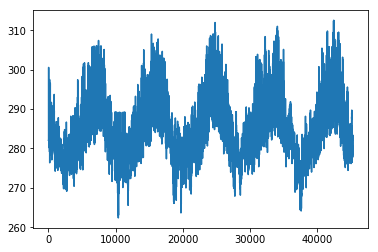

In [6]:
plt.plot([i for i in range(data.shape[0])], data[city])

## 2. Detrending (diferencing)

In [7]:
def detrend(data):
    diff = []
    for i in range(1, len(data)):
        value = data[i] - data[i - 1]
        diff.append(value)
    return diff

In [8]:
values = data[city].values

In [9]:
detrended = detrend(values)

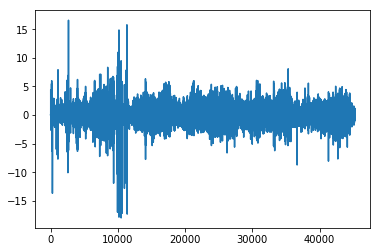

In [10]:
plt.plot([i for i in range(len(detrended))], detrended)

# Lib: statsmodel

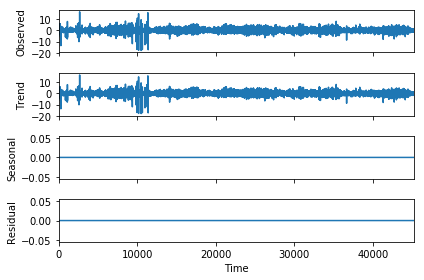

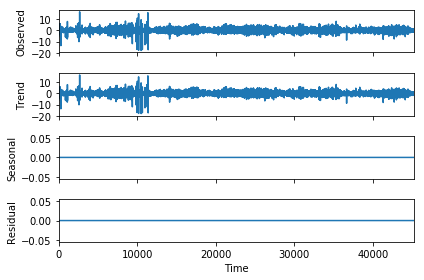

In [15]:
decomposition = sm.tsa.seasonal_decompose(detrended, model='additive', freq=1)
decomposition.plot()

In [16]:
decomposition.seasonal[:5]

array([0., 0., 0., 0., 0.])

# Lib: stldecompose

In [17]:
decomp = decompose(detrended, period=8760)
decomp

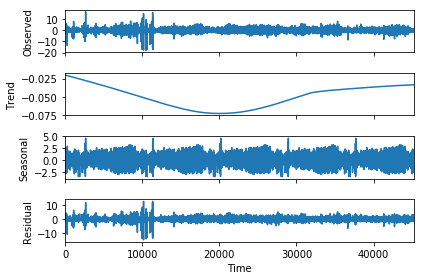

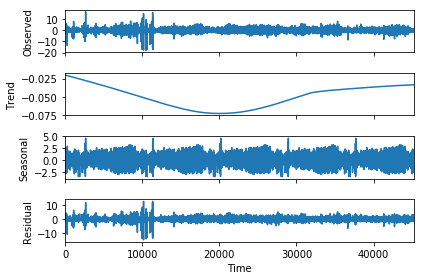

In [18]:
decomp.plot()

In [19]:
season = decomp.seasonal

In [21]:
season[:5]

array([0.01470469, 0.78869145, 0.46236089, 1.03895389, 0.88228777])

## 3. FFT on Seasonality (STL)
## lib stldecompose

In [22]:
def fft(data):
    magnitude = data
    samplingFrequency = len(magnitude)
    fourierTransform = np.fft.fft(magnitude)

    fourierTransform = fourierTransform/len(magnitude)           # Normalize amplitude
    fourierTransform = fourierTransform[range(int(len(magnitude)/2))] # Exclude sampling frequency

    tpCount     = len(magnitude)
    values      = np.arange(int(tpCount/2))
    timePeriod  = tpCount/samplingFrequency
    frequencies = values/timePeriod
    

    frequencies = frequencies[1:]
    fourierTransform = fourierTransform[1:]

    return frequencies, fourierTransform

In [23]:
frequencies, fourier = fft(detrended)

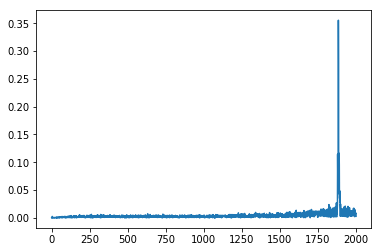

In [24]:
plt.plot(frequencies[:2001], abs(fourier)[:2001])

# Ordered signals by frequency

In [25]:
ziped_freqs = list(zip(frequencies, fourier))
sorted_by_freqs = sorted(ziped_freqs, key=lambda tup: tup[1])

In [26]:
print("frequency signal, fft")
for i, item in enumerate(sorted_by_freqs[:10]):
    print(i+1, ":", item)

frequency signal, fft
1 : (1886.0, (-0.2566279955753091-0.10481066484017161j))
2 : (3771.0, (-0.13044953683859184+0.0072166604098922735j))
3 : (1890.0, (-0.10865474267649743+0.041375996613157114j))
4 : (1887.0, (-0.08667259607477164-0.014607733049678528j))
5 : (1889.0, (-0.08371123230003881+0.02203584809833376j))
6 : (1888.0, (-0.06383370314297346+0.014777680973646058j))
7 : (16970.0, (-0.05136426596828051+0.001673555628534991j))
8 : (18855.0, (-0.04196613930226982+0.02121165605883238j))
9 : (3776.0, (-0.03187268644019865-0.008440858353290266j))
10 : (18850.0, (-0.031800532320775655+0.004672360480407679j))
